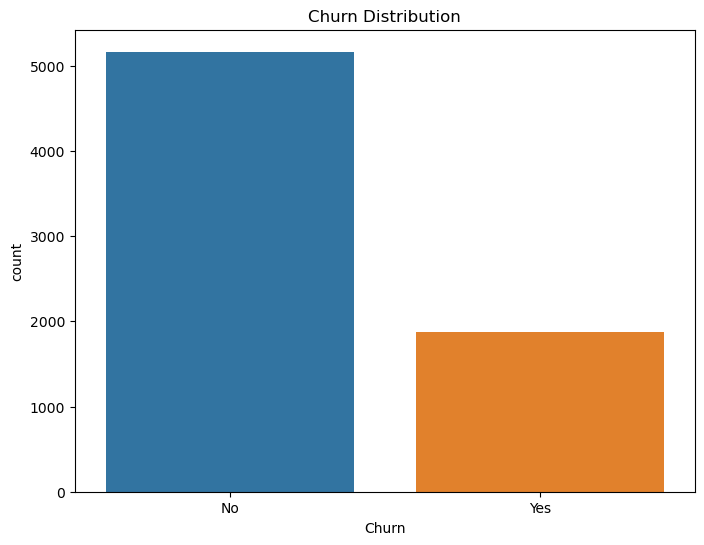

RandomForest Accuracy: 0.8422
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1037
           1       0.84      0.84      0.84      1029

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066

[[873 164]
 [162 867]]
GradientBoosting Accuracy: 0.8253
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1037
           1       0.81      0.85      0.83      1029

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066

[[830 207]
 [154 875]]


OSError: Cannot save file into a non-existent directory: 'data'

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

# Try importing XGBoost, handle error if not installed
try:
    from xgboost import XGBClassifier
    models_have_xgb = True
except ImportError:
    models_have_xgb = False

# Load dataset
df = pd.read_csv(r"C:\Users\adith\Documents\Customer Churn Prediction ML Project\data\WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Data Preprocessing
df.replace(" ", np.nan, inplace=True)
df.drop(columns=['customerID'], inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(8,6))
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


# Encoding categorical features
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Feature selection
X = df.drop(columns=['Churn'])
y = df['Churn']

# Handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Model Training and Evaluation
models = {
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier()
}

if models_have_xgb:
    models["XGBoost"] = XGBClassifier()

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

# Save best model
best_model = max(results, key=results.get)
with open("churn_model.pkl", "wb") as f:
    pickle.dump(models[best_model], f)
    
# Export cleaned dataset for visualization
df.to_csv("data/cleaned_customer_churn.csv", index=False)
